In [1]:
#setup
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import os.path as os
import requests

In [2]:

#Change root to the folder where you have the data stored, AR has the group project
root = r"G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project"
#Change this to match your folder structure
inp= os.join(root, "/Results")


In [3]:
from pydrive.auth import GoogleAuth

gauth = GoogleAuth()
gauth.LocalWebserverAuth() # Creates local webserver and auto handles authentication.

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=570719947456-53haph7mjc317oel1ujh0kmjbfd499jf.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=offline&response_type=code

Authentication successful.


In [4]:
# files in clean data google drive
from pydrive.drive import GoogleDrive
drive = GoogleDrive(gauth)
fileList = drive.ListFile({'q': "'1jxSI_nq32-W9kPHKvQkzuNGJ5aIBD2j2' in parents and trashed=false"}).GetList()
for file in fileList:
  print('Title: %s, ID: %s' % (file['title'], file['id']))
  # Get the folder ID that you want
  if(file['title'] == "To Share"):
      fileID = file['id']

Title: analysis_box.csv, ID: 1Vzjvta98IG9Hg4SfAGcd8JD8FaF3IXwy
Title: analysis_bbl.csv, ID: 1yYX-ROr1c7fzcQiG6NZ1sh7Ko5gqr_4G
Title: analysis_bbl_noacs.csv, ID: 1h-tDpBSslfzqzsJe1ny_ujDnr68RKry3
Title: borobox_convex_hull.geojson, ID: 1SzBNj3Ba-v9MEwuCkZT9e9iAwVYUqx8r


In [8]:
census_ct= gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2010_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")

census_ct

,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Area,Shape__Length,geometry
0,1,9,5,Staten Island,000900,5000900,E,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64344, -74.07914 40.643..."
1,2,98,1,Manhattan,009800,1009800,I,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200308,"POLYGON ((-73.96433 40.75639, -73.96479 40.755..."
2,3,102,1,Manhattan,010200,1010200,I,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,4,104,1,Manhattan,010400,1010400,I,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76230, -73.97492 40.761..."
4,5,113,1,Manhattan,011300,1011300,I,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860640,"POLYGON ((-73.98412 40.75485, -73.98460 40.754..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,2161,183.02,2,Bronx,018302,2018302,I,BX14,East Concourse-Concourse Village,3708,1.208595e+06,4627.750710,"POLYGON ((-73.91811 40.83001, -73.91729 40.829..."
2161,2162,196,1,Manhattan,019600,1019600,I,MN34,East Harlem North,3804,1.902453e+06,5776.739392,"POLYGON ((-73.93631 40.80303, -73.93677 40.802..."
2162,2163,242,1,Manhattan,024200,1024200,E,MN34,East Harlem North,3804,3.726642e+06,9379.633899,"POLYGON ((-73.92998 40.80299, -73.93015 40.802..."
2163,2164,69,2,Bronx,006900,2006900,E,BX34,Melrose South-Mott Haven North,3710,2.029126e+06,6537.689395,"POLYGON ((-73.91182 40.82204, -73.91217 40.821..."


<AxesSubplot:>

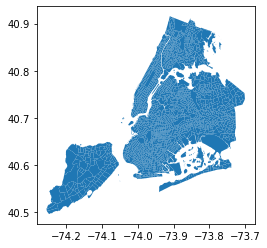

In [9]:
census_ct.plot()

In [10]:
pr_prob = pd.read_csv("G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project/Data/data_for_viz/pred_prob_ct.csv").drop(["Unnamed: 0"], axis = 1)

In [11]:
pr_prob

,boroct2010,prob_fire_dt,prob_fire_rf,vacate_ind
0,1000201,0.024620,0.030386,0.037037
1,1000202,0.010198,0.013792,0.000000
2,1000600,0.023537,0.021658,0.015873
3,1000700,0.013416,0.012050,0.000000
4,1000800,0.027511,0.022870,0.029412
...,...,...,...,...
2105,5030301,0.000485,0.000333,0.000000
2106,5030302,0.000193,0.000170,0.000000
2107,5031901,0.000678,0.000549,0.000000
2108,5031902,0.001520,0.001297,0.001232


In [12]:
pr_prob_nb = pd.read_csv("G:/.shortcut-targets-by-id/1hgVHDpl_iZ7es6sKW0QRlC9X6SF58wk7/Machine Learning 4 Cities Final Project/Data/data_for_viz/pred_prob_naivebayes_allbld.csv").drop(["Unnamed: 0"], axis = 1)

In [13]:
pr_prob_nb

,boroct2010,bbl,prob_vacate_bl
0,1018100,1012090027,0.000007
1,1018100,1012090028,0.000007
2,1018100,1012090037,1.000000
3,1018100,1012090049,0.000060
4,1018100,1012090051,0.000055
...,...,...,...
765021,1002500,1001110100,NaN
765022,1001002,1003250001,0.000451
765023,1001002,1003230001,1.000000
765024,1002000,1003560001,1.000000


In [14]:
pr_prob_merge = pd.merge(pr_prob_nb, pr_prob, on="boroct2010")

In [15]:
pr_prob_merge

,boroct2010,bbl,prob_vacate_bl,prob_fire_dt,prob_fire_rf,vacate_ind
0,1018100,1012090027,0.000007,0.014711,0.012531,0.023256
1,1018100,1012090028,0.000007,0.014711,0.012531,0.023256
2,1018100,1012090037,1.000000,0.014711,0.012531,0.023256
3,1018100,1012090049,0.000060,0.014711,0.012531,0.023256
4,1018100,1012090051,0.000055,0.014711,0.012531,0.023256
...,...,...,...,...,...,...
765021,1002500,1001110100,NaN,0.001965,0.006131,0.000000
765022,1001002,1003250001,0.000451,0.000983,0.024935,0.000000
765023,1001002,1003230001,1.000000,0.000983,0.024935,0.000000
765024,1002000,1003560001,1.000000,0.001965,0.047768,0.000000


In [31]:
census_ct['boroct2010']= census_ct['BoroCT2010'].astype('int')

In [32]:
census_ct.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2165 entries, 0 to 2164
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2165 non-null   int64   
 1   CTLabel        2165 non-null   object  
 2   BoroCode       2165 non-null   object  
 3   BoroName       2165 non-null   object  
 4   CT2010         2165 non-null   object  
 5   BoroCT2010     2165 non-null   object  
 6   CDEligibil     2164 non-null   object  
 7   NTACode        2165 non-null   object  
 8   NTAName        2165 non-null   object  
 9   PUMA           2165 non-null   object  
 10  Shape__Area    2165 non-null   float64 
 11  Shape__Length  2165 non-null   float64 
 12  geometry       2165 non-null   geometry
 13  boroct2010     2165 non-null   int32   
dtypes: float64(2), geometry(1), int32(1), int64(1), object(9)
memory usage: 228.5+ KB


In [33]:
pr_prob_ct = pd.merge(pr_prob_merge, census_ct, how='inner', on='boroct2010')

In [35]:
pr_prob_ct

,boroct2010,bbl,prob_vacate_bl,prob_fire_dt,prob_fire_rf,vacate_ind,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Area,Shape__Length,geometry
0,1018100,1012090027,0.000007,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
1,1018100,1012090028,0.000007,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
2,1018100,1012090037,1.000000,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
3,1018100,1012090049,0.000060,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
4,1018100,1012090051,0.000055,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765021,1002500,1001110100,NaN,0.001965,0.006131,0.000000,1070,25,1,Manhattan,002500,1002500,E,MN27,Chinatown,3809,1.439388e+06,4763.703057,"POLYGON ((-73.99602 40.70892, -73.99667 40.708..."
765022,1001002,1003250001,0.000451,0.000983,0.024935,0.000000,2019,10.02,1,Manhattan,001002,1001002,E,MN28,Lower East Side,3809,2.225432e+06,6315.113664,"POLYGON ((-73.97351 40.71878, -73.97369 40.718..."
765023,1001002,1003230001,1.000000,0.000983,0.024935,0.000000,2019,10.02,1,Manhattan,001002,1001002,E,MN28,Lower East Side,3809,2.225432e+06,6315.113664,"POLYGON ((-73.97351 40.71878, -73.97369 40.718..."
765024,1002000,1003560001,1.000000,0.001965,0.047768,0.000000,1132,20,1,Manhattan,002000,1002000,E,MN28,Lower East Side,3809,1.368673e+06,4690.064940,"POLYGON ((-73.97289 40.72110, -73.97300 40.720..."


In [40]:
pr_prob_ct = gpd.GeoDataFrame(pr_prob_ct, geometry='geometry')

In [41]:
pr_prob_ct

,boroct2010,bbl,prob_vacate_bl,prob_fire_dt,prob_fire_rf,vacate_ind,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Area,Shape__Length,geometry
0,1018100,1012090027,0.000007,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
1,1018100,1012090028,0.000007,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
2,1018100,1012090037,1.000000,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
3,1018100,1012090049,0.000060,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
4,1018100,1012090051,0.000055,0.014711,0.012531,0.023256,1396,181,1,Manhattan,018100,1018100,I,MN12,Upper West Side,3806,1.489903e+06,5253.878200,"POLYGON ((-73.96418 40.79237, -73.96469 40.791..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765021,1002500,1001110100,NaN,0.001965,0.006131,0.000000,1070,25,1,Manhattan,002500,1002500,E,MN27,Chinatown,3809,1.439388e+06,4763.703057,"POLYGON ((-73.99602 40.70892, -73.99667 40.708..."
765022,1001002,1003250001,0.000451,0.000983,0.024935,0.000000,2019,10.02,1,Manhattan,001002,1001002,E,MN28,Lower East Side,3809,2.225432e+06,6315.113664,"POLYGON ((-73.97351 40.71878, -73.97369 40.718..."
765023,1001002,1003230001,1.000000,0.000983,0.024935,0.000000,2019,10.02,1,Manhattan,001002,1001002,E,MN28,Lower East Side,3809,2.225432e+06,6315.113664,"POLYGON ((-73.97351 40.71878, -73.97369 40.718..."
765024,1002000,1003560001,1.000000,0.001965,0.047768,0.000000,1132,20,1,Manhattan,002000,1002000,E,MN28,Lower East Side,3809,1.368673e+06,4690.064940,"POLYGON ((-73.97289 40.72110, -73.97300 40.720..."


<AxesSubplot:>

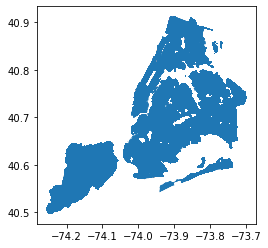

In [42]:
pr_prob_ct.plot()

<AxesSubplot:>

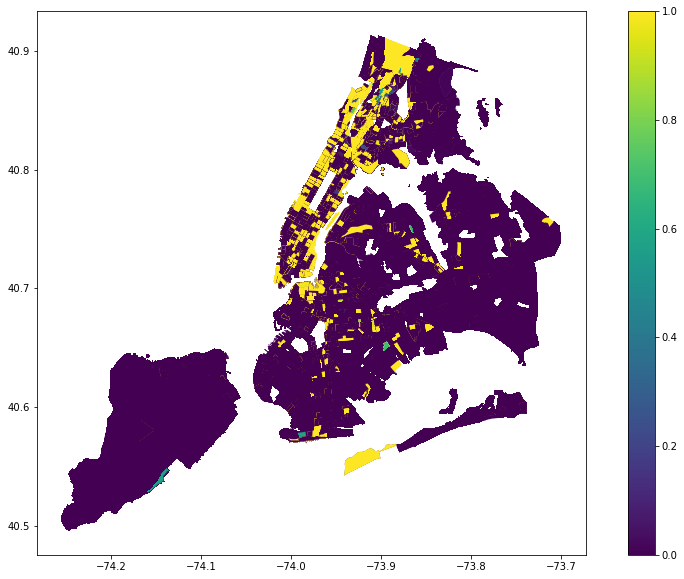

In [44]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct.plot(column='prob_vacate_bl', ax=ax, legend=True)

<AxesSubplot:>

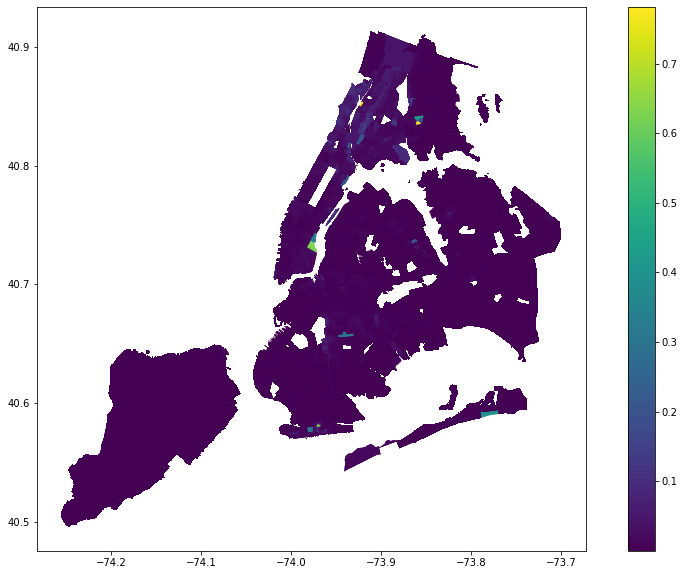

In [45]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct.plot(column='prob_fire_dt', ax=ax, legend=True)

<AxesSubplot:>

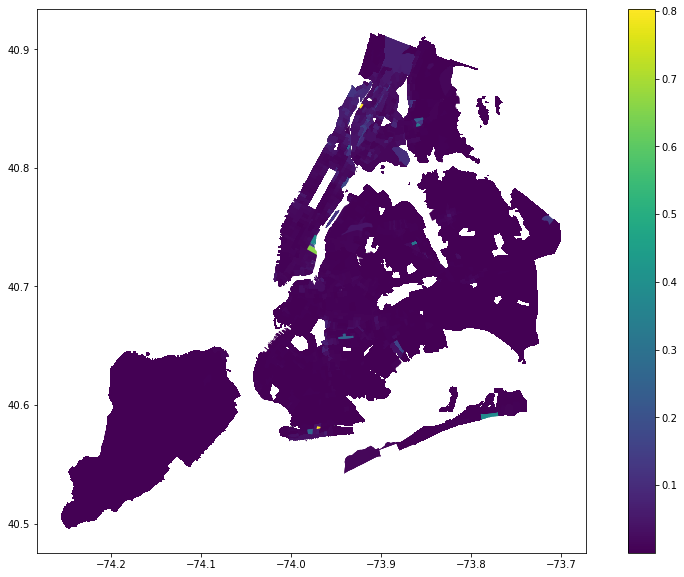

In [46]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct.plot(column='prob_fire_rf', ax=ax, legend=True)

<AxesSubplot:>

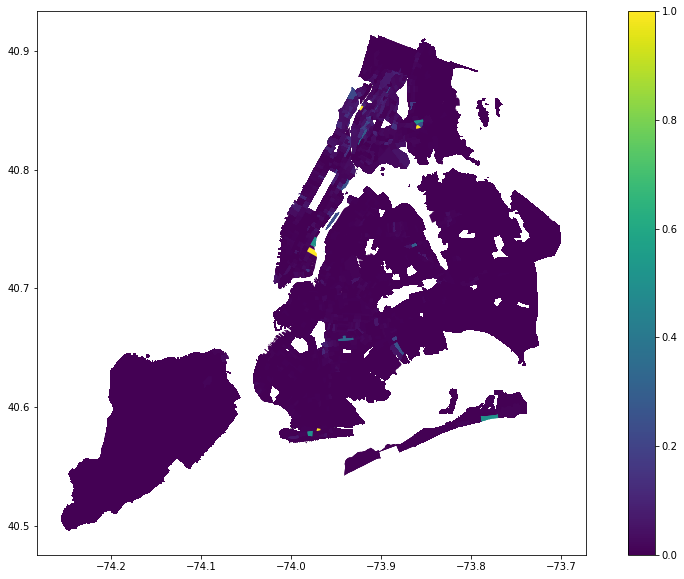

In [47]:
fig, ax = plt.subplots(1, figsize=(15,10))
pr_prob_ct.plot(column='vacate_ind', ax=ax, legend=True)

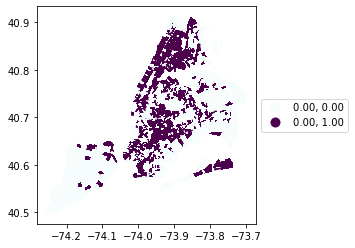

In [49]:
%matplotlib inline
ax = pr_prob_ct.plot(column='vacate_ind', scheme='QUANTILES', k=2, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})